### Introdução.
Este notebook investiga a base de dados de propriedades acústicas disponíveis no site [http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/](http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/)

Objetivo da investigação é determinar as chances de algum algoritmo para detecção de gênero, seja por estatística tradicional ou por meio técnicas machine learning, possibilitando a implantação em dispositivos embarcados de baixo custo.

# Propriedades acústicas medidas

  

As seguintes propriedades acústicas de cada voz são medidas:

  

- **meanfreq** : frequência média (em kHz) sobre as amostras compostas no sinal de arquivo de voz;

- **sd** : desvio padrão da frequência, sobre as amostras compostas no sinal de arquivo de voz;

- **mediana** : frequência mediana (em kHz) sobre as amostras compostas no sinal de arquivo de voz;

- **Q25** : primeiro quartil (em kHz) sobre as amostras compostas no sinal de arquivo de voz;

- **Q75** : terceiro quartil (em kHz) sobre as amostras compostas no sinal de arquivo de voz;

- **IQR** : intervalo interquartil (em kHz)sobre as amostras compostas no sinal de arquivo de voz;

- **skew** : média de assimetria da distribuição das frequências de vocal predominante;

- **kurt** : curtose distribuição espectral da voz, domínio da frequência;

- **sp.ent** : entropia espectral, pureza da distribuição da voz em relação ao nível de ruído;

- **sfm** : nivelamento espectral, estima a planaridade de um espectro de frequência;

- **modo** : frequência de modo, ou seja, frequência dominante da voz;

- **centrod** : frequência central máxima visto no domínio da frequência;

- **meanfun** : média da frequência fundamental medida através do sinal acústico (Tonalidade base da voz);

- **minfun** : frequência fundamental mínima medida no sinal acústico (Tonalidade base da voz);

- **maxfun** : frequência fundamental máxima medida através do sinal acústico (Tonalidade base da voz);

- **meandom** : média da frequência dominante medida através do sinal acústico (média total das notas musicais mais graves da voz em relação ao sinal gravado);

- **mindom** : mínimo de frequência dominante medido através do sinal acústico;

- **maxdom** : máxima da frequência dominante medida através do sinal acústico;

- **dfrange** : faixa de frequência dominante medida através do sinal acústico;

- **modindx** : índice de modulação. Calculado como a diferença absoluta acumulada entre medições adjacentes de frequências fundamentais divididas pela faixa de frequência.

- **label** : rótulo de identificador da amostra em relação ao sexo, adicionado durante a gravação "male" ou "female".

## Análise em python da base de propriedades acústicas.

In [1]:
%matplotlib inline

In [2]:
# Importa as bibliotecas
import pandas
import matplotlib.pyplot as plt
import numpy 
#from pandas.tools.plotting import scatter_matrix
from  pandas.plotting  import scatter_matrix
import seaborn as sb

In [3]:
# Carrega os dados
url = ".\\baseDados\\voice.csv"
colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url, names=colunas, sep = ",")

In [4]:
# PANDAS: Verificando alguns dados
exemplos = dataset.head(2)
print(exemplos)

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   

         kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0  274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1  634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  

[2 rows x 21 columns]


In [5]:
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
dataset.tail()
exemplos = dataset.tail(2)
print(exemplos)

      meanfreq        sd    median       Q25       Q75       IQR      skew  \
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435  1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756  1.705029   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
3166  5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167  5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[2 rows x 21 columns]


# Verificando valores nulos.

In [7]:
dfnull = dataset.isnull()

In [8]:
dfnull.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Gerando gráfico com valores nulos.

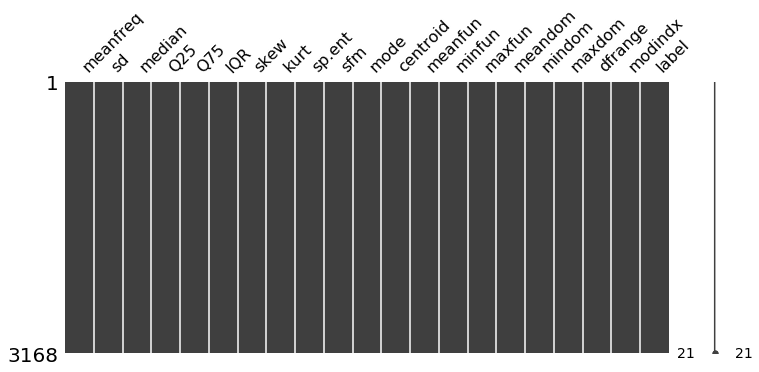

In [9]:
#!pip install missingno
#!pip3 install missingno


import missingno as msno
msno.matrix(dataset,figsize=(12,5))

###  A tabela sem elementos nulos tem  a mesma dimensão da tabela original, portanto a base não possui valores nulos.

## Verifica os tipos de dados de cada atributo.


In [10]:
tipos = dataset.dtypes
print(tipos)

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object


## Variáveis Categóricas

In [11]:
contagem = dataset.groupby('label').size()
print(contagem)


label
female    1584
male      1584
dtype: int64


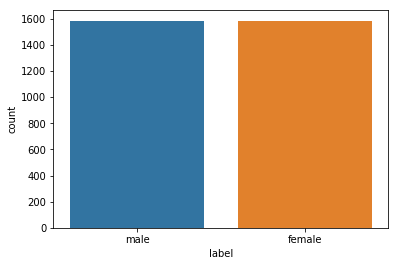

In [12]:
sb.countplot('label',data=dataset)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

In [13]:
## Separação dos dados pela classe label, vozes de homens e mulheres.
dfHomens = dataset[dataset["label"] == "male"]
dfMulheres = dataset[dataset["label"] == "female"]

### Conferindo segmentações das vozes masculinas.

In [14]:
dfHomens.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male


In [15]:
dfHomens.tail(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1582,0.162350,0.060335,0.140085,0.112611,0.224204,0.111593,3.506742,20.298964,0.907180,0.412580,...,0.162350,0.110352,0.019231,0.27027,0.420532,0.087891,0.771484,0.683594,0.600000,male
1583,0.158781,0.059852,0.147013,0.107879,0.216797,0.108918,3.648593,20.799925,0.898225,0.401169,...,0.158781,0.115299,0.079365,0.25000,0.460938,0.087891,0.786133,0.698242,0.552115,male


### Conferindo segmentações das vozes femininas.

In [16]:
dfMulheres.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1584,0.158108,0.082782,0.191191,0.062350,0.224552,0.162202,2.801344,19.929617,0.952161,0.679223,...,0.158108,0.185042,0.023022,0.275862,0.272964,0.046875,0.742188,0.695312,0.339888,female
1585,0.182855,0.067789,0.200639,0.175489,0.226068,0.050579,3.001890,19.865482,0.910458,0.506099,...,0.182855,0.159590,0.018713,0.266667,0.258970,0.054688,0.804688,0.750000,0.269231,female


In [17]:
dfMulheres.tail(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


### BOXPLOT:  vozes femininas - Verificando discrepâncias

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


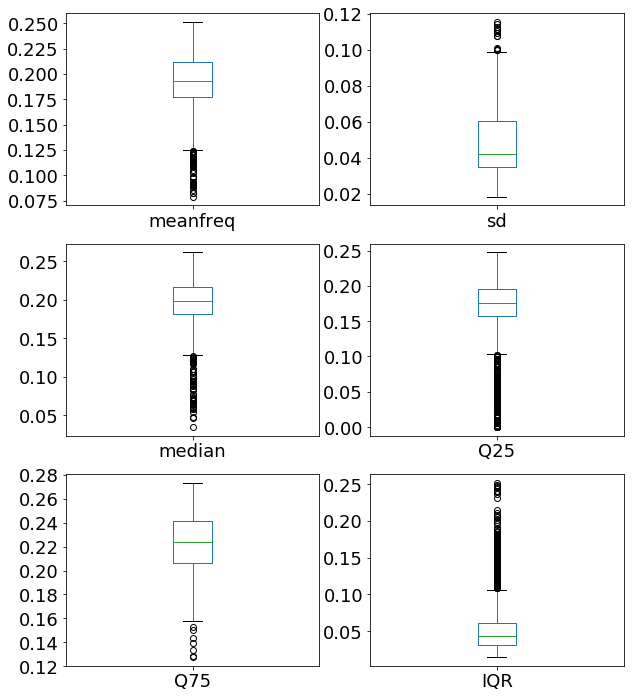

In [18]:
print(colunas)
plt.rcParams['figure.figsize'] = (10,12)
dfMulheres[colunas[0:6]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()

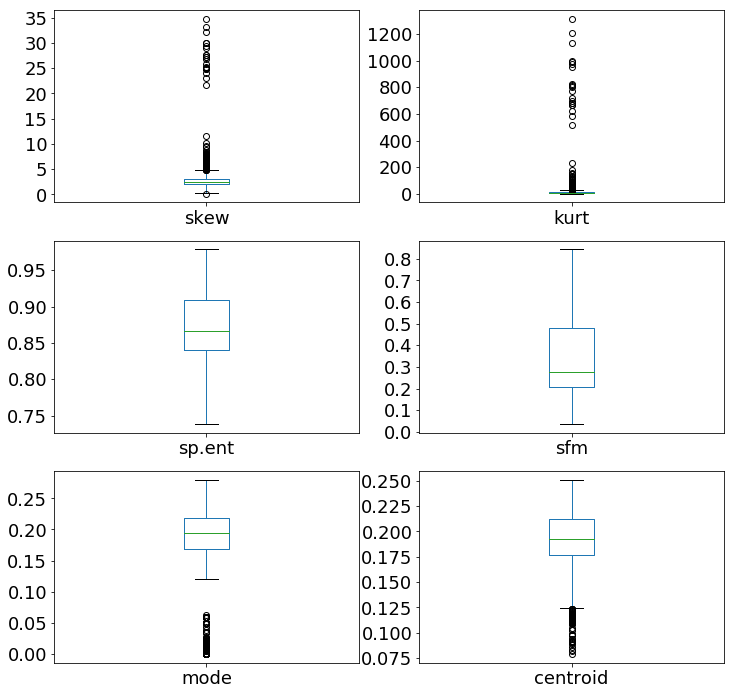

In [19]:
plt.rcParams['figure.figsize'] = (12,12)
dfMulheres[colunas[6:12]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()

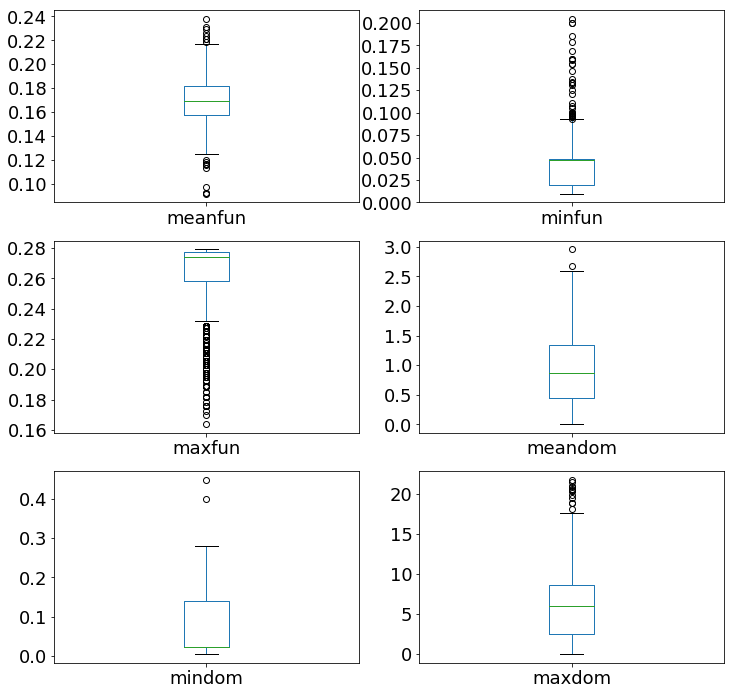

In [20]:
plt.rcParams['figure.figsize'] = (12,12)
dfMulheres[colunas[12:18]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()


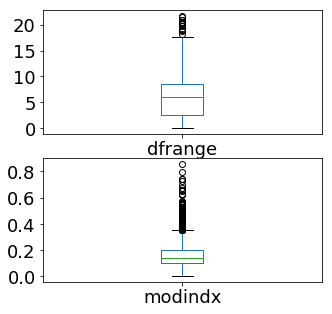

In [21]:
plt.rcParams['figure.figsize'] = (5,5)
dfMulheres[colunas[18:20]].plot(kind='box', subplots=True, layout=(2,1), sharex=False, sharey=False,fontsize=18)
plt.show()

### BOXPLOT: vozes masculinas - Verificando discrepâncias

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


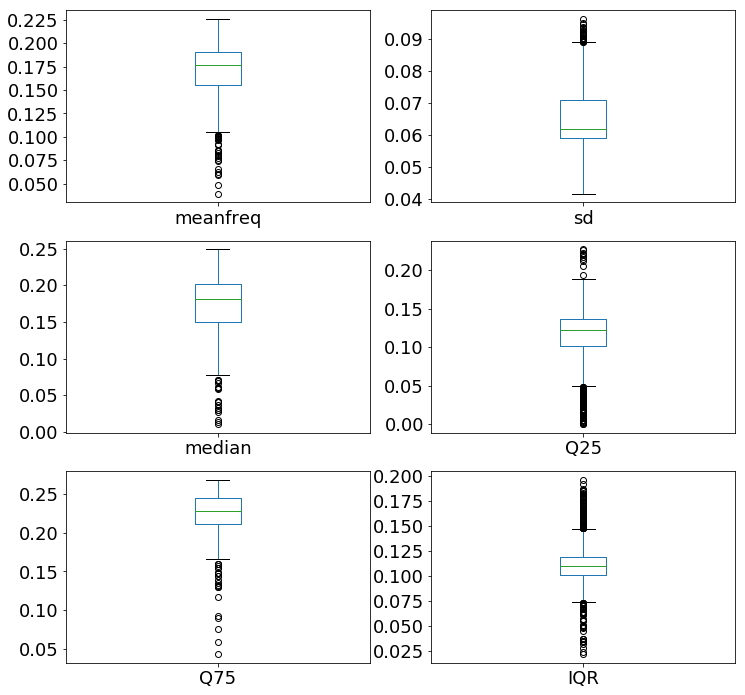

In [22]:
print(colunas)
plt.rcParams['figure.figsize'] = (12,12)
dfHomens[colunas[0:6]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()


['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


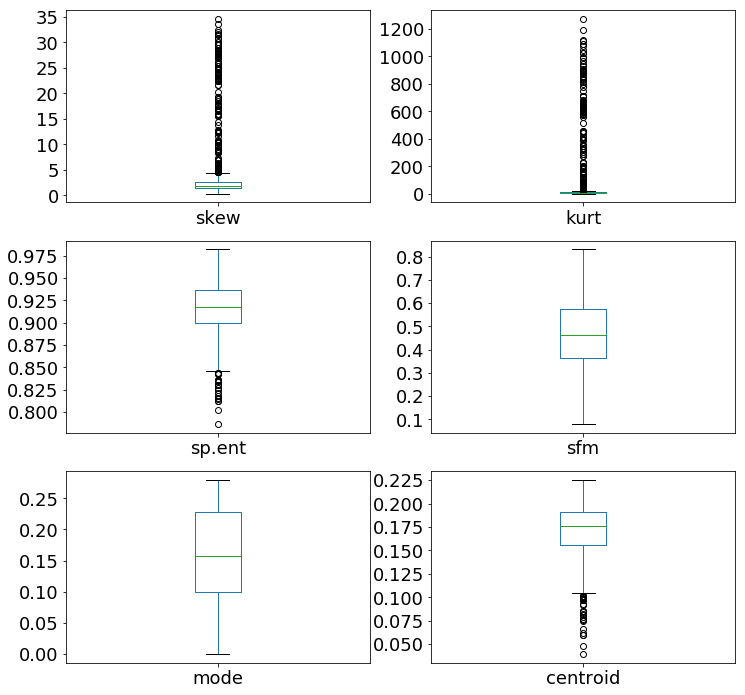

In [23]:
print(colunas)
plt.rcParams['figure.figsize'] = (12,12)
dfHomens[colunas[6:12]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()


['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


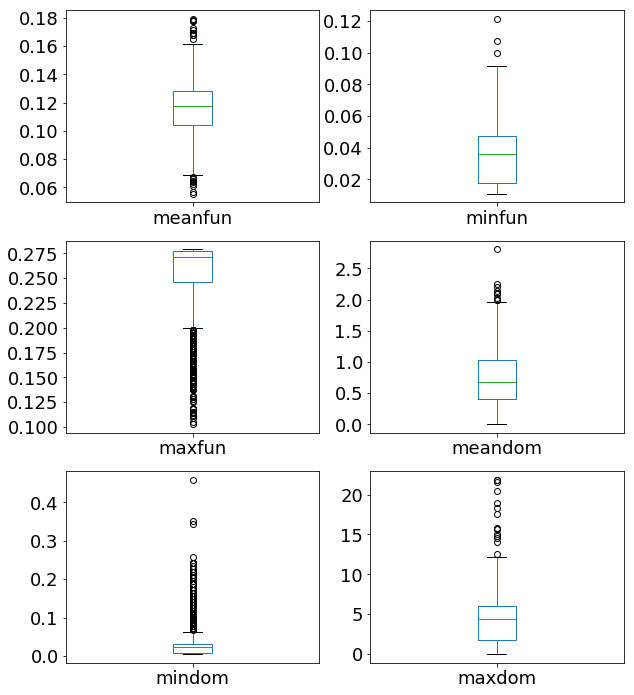

In [24]:
print(colunas)
plt.rcParams['figure.figsize'] = (10,12)
dfHomens[colunas[12:18]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()



['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


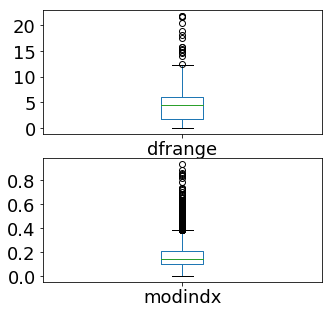

In [25]:
print(colunas)
plt.rcParams['figure.figsize'] = (5,5)
dfHomens[colunas[18:20]].plot(kind='box', subplots=True, layout=(2,1), sharex=False, sharey=False,fontsize=18)
plt.show()


### Método de interquartil.

Definição 
A gama interquartil (IQR), também chamado o midspread ou meio de 50%, ou tecnicamente H-propagação , é uma medida da dispersão estatística, sendo igual à diferença entre os percentis 75 e 25 de, ou entre os quartis superiores e inferiores, IQR = Q 3 - Q 1.
Em outras palavras, o IQR é o primeiro quartil subtraído do terceiro quartil; esses quartis podem ser vistos claramente em um gráfico de caixa nos dados.
É uma medida da dispersão semelhante ao desvio ou variância padrão, mas é muito mais robusta contra valores extremos.

### Aplicando nos dados  de vozes femininas, Técnica do Interquartil


In [26]:
dfgrafico_test = dfMulheres
NV=6
for z in range(0,NV):
    for y in colunas:
        if y == "label":
            continue
        Q1 = dfgrafico_test[y].quantile(0.25)
        Q3 = dfgrafico_test[y].quantile(0.75)
        IQR = Q3 - Q1
        df_sem_Outliersx = dfgrafico_test[y][~((dfgrafico_test[y] < (Q1 - 1.5 * IQR)) | (dfgrafico_test[y]> (Q3 + 1.5 * IQR)))] 
        dfgrafico_test[y] = df_sem_Outliersx

    


c:\users\jorge\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### Imprimindo os dados discrepantes removidos nos dados  de vozes femininas

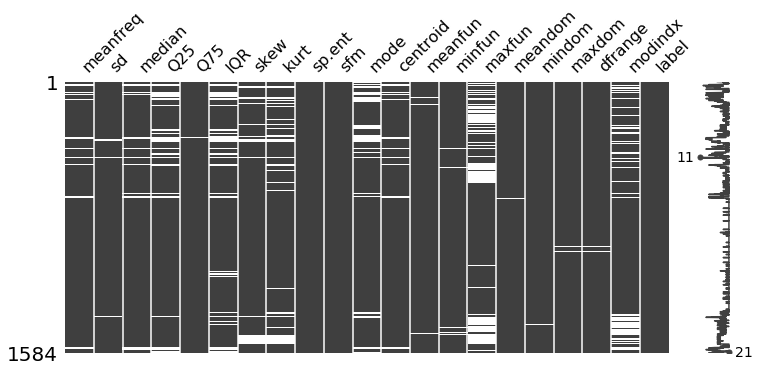

In [27]:
msno.matrix(dfgrafico_test,figsize=(12,5))

In [28]:
dfgrafico_test = dfMulheres
for z in range(0,NV):
    for y in colunas:
        if y == "label":
            continue
        Q1 = dfMulheres[y].quantile(0.25)
        Q3 = dfMulheres[y].quantile(0.75)
        IQR = Q3 - Q1
        df_sem_Outliersx = dfMulheres[y][~((dfMulheres[y] < (Q1 - 1.5 * IQR)) | (dfMulheres[y]> (Q3 + 1.5 * IQR)))] 
        dfMulheres[y] = df_sem_Outliersx
        dfMulheres=dfMulheres.fillna(dfMulheres.mean())


c:\users\jorge\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [29]:
### Imprime dados normalizados de vozes femininas

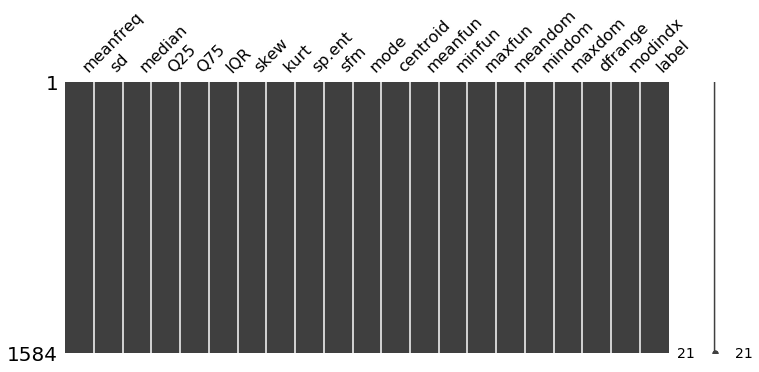

In [30]:
msno.matrix(dfMulheres,figsize=(12,5))

### Aplicando nos dados  de vozes masculinas, Técnica do Interquartil

In [31]:
dfgrafico_test = dfHomens
NV=6
for z in range(0,NV):
    for y in colunas:
        if y == "label":
            continue
        Q1 = dfgrafico_test[y].quantile(0.25)
        Q3 = dfgrafico_test[y].quantile(0.75)
        IQR = Q3 - Q1
        df_sem_Outliersx = dfgrafico_test[y][~((dfgrafico_test[y] < (Q1 - 1.5 * IQR)) | (dfgrafico_test[y]> (Q3 + 1.5 * IQR)))] 
        dfgrafico_test[y] = df_sem_Outliersx


c:\users\jorge\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### ImprimIndo os dados discrepantes removidos nos dados  de vozes masculinas

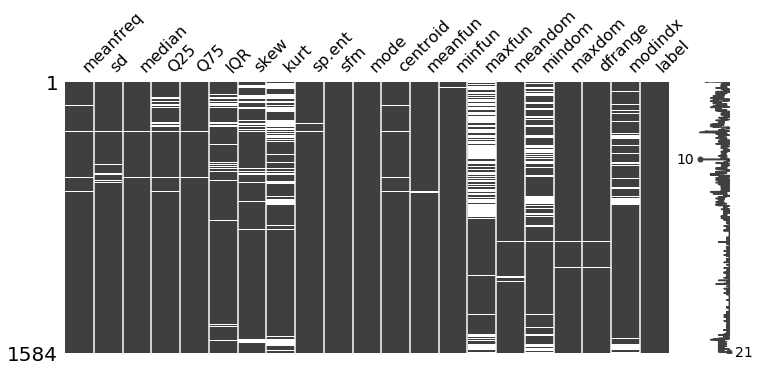

In [32]:
msno.matrix(dfgrafico_test,figsize=(12,5))

In [33]:
dfgrafico_test = dfHomens
for z in range(0,NV):
    for y in colunas:
        if y == "label":
            continue
        Q1 = dfHomens[y].quantile(0.25)
        Q3 = dfHomens[y].quantile(0.75)
        IQR = Q3 - Q1
        df_sem_Outliersx = dfHomens[y][~((dfHomens[y] < (Q1 - 1.5 * IQR)) | (dfHomens[y]> (Q3 + 1.5 * IQR)))] 
        dfHomens[y] = df_sem_Outliersx
        dfHomens=dfHomens.fillna(dfHomens.mean())


c:\users\jorge\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Imprimindo os dados normalizados de vozes masculinas

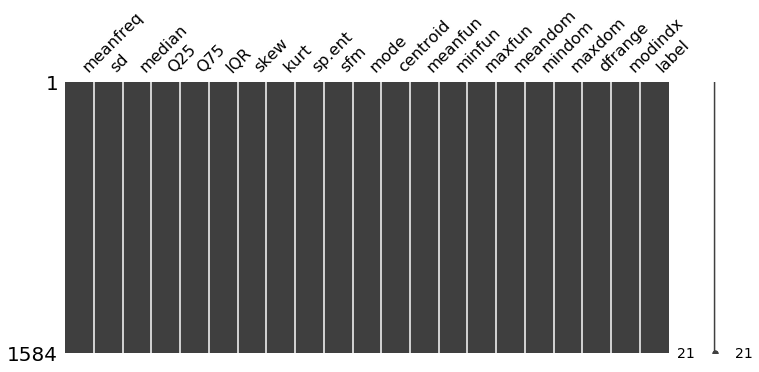

In [34]:
msno.matrix(dfHomens,figsize=(12,5))

### BOXPLOT:  vozes femininas

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


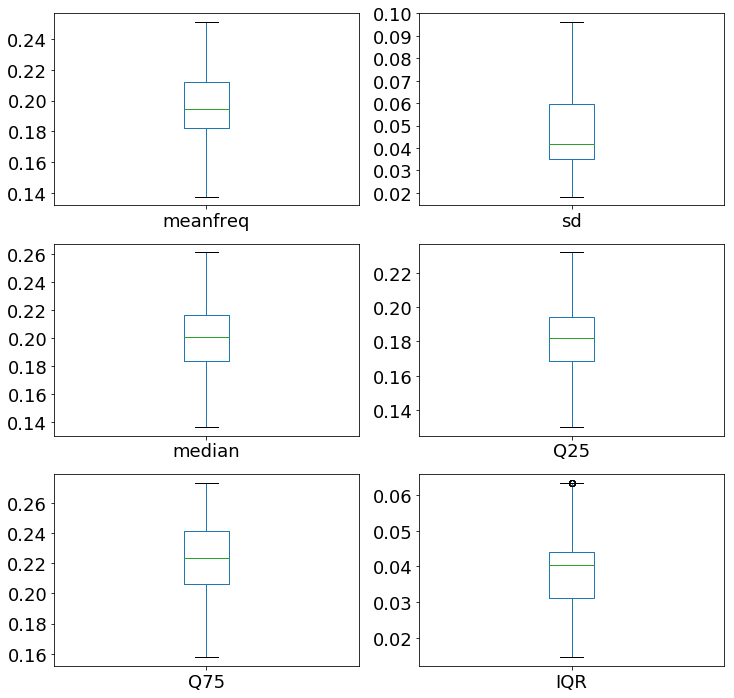

In [35]:
print(colunas)
plt.rcParams['figure.figsize'] = (12,12)
dfMulheres[colunas[0:6]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()


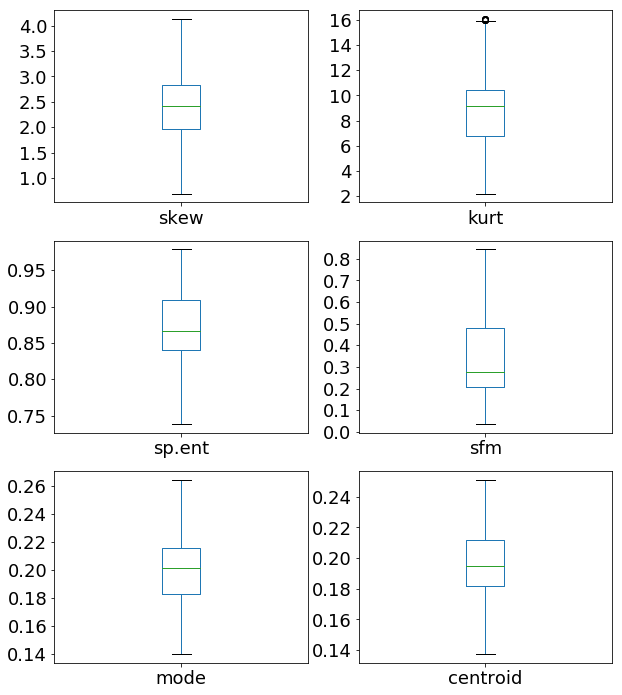

In [36]:
plt.rcParams['figure.figsize'] = (10,12)
dfMulheres[colunas[6:12]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()


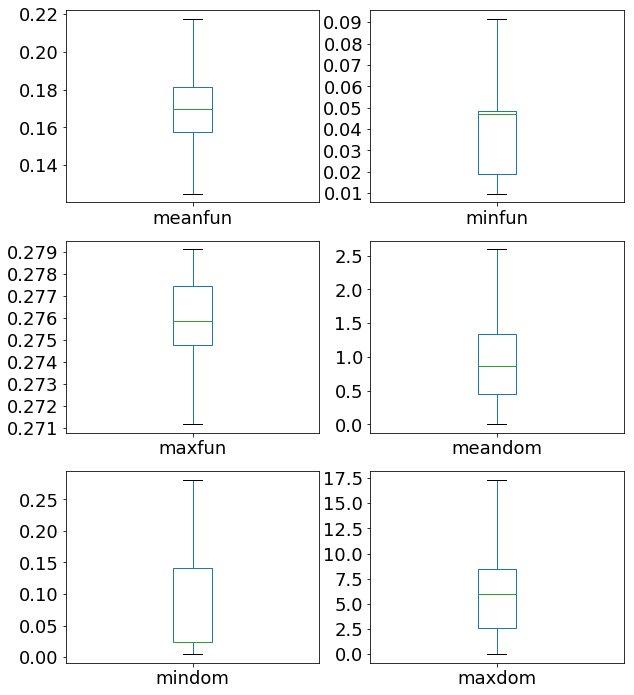

In [37]:
plt.rcParams['figure.figsize'] = (10,12)
dfMulheres[colunas[12:18]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


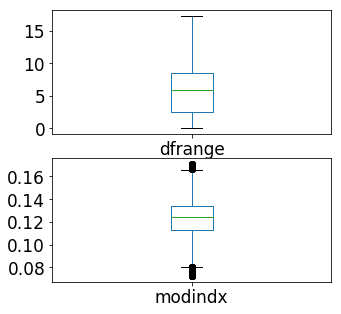

In [38]:
print(colunas)
plt.rcParams['figure.figsize'] = (5,5)
dfMulheres[colunas[18:20]].plot(kind='box', subplots=True, layout=(2,1), sharex=False, sharey=False,fontsize=17)
plt.show()

### BOXPLOT:  vozes masculinas

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


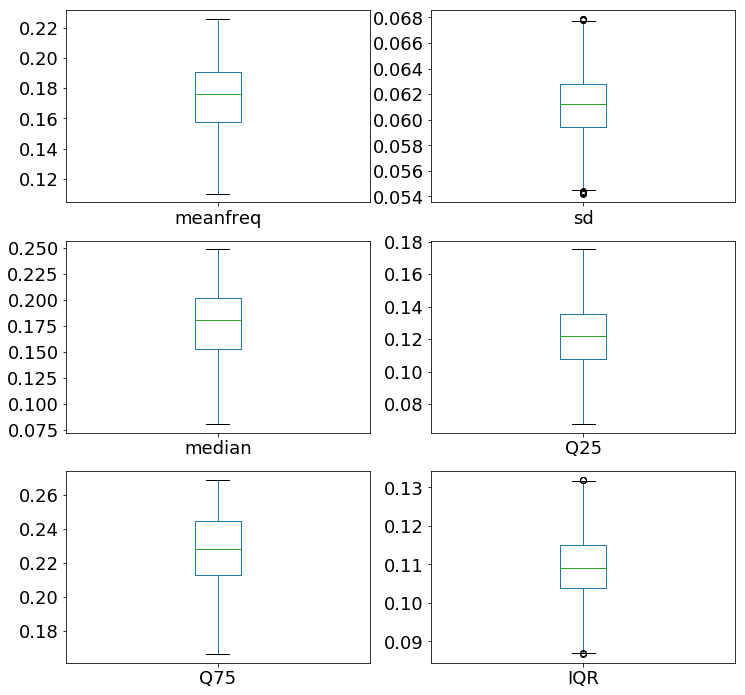

In [39]:
print(colunas)
plt.rcParams['figure.figsize'] = (12,12)
dfHomens[colunas[0:6]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()

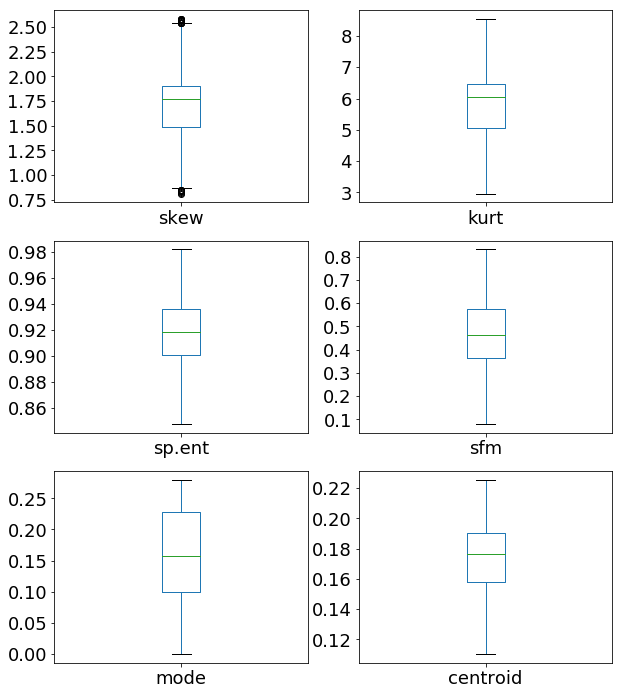

In [40]:
plt.rcParams['figure.figsize'] = (10,12)
dfHomens[colunas[6:12]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()


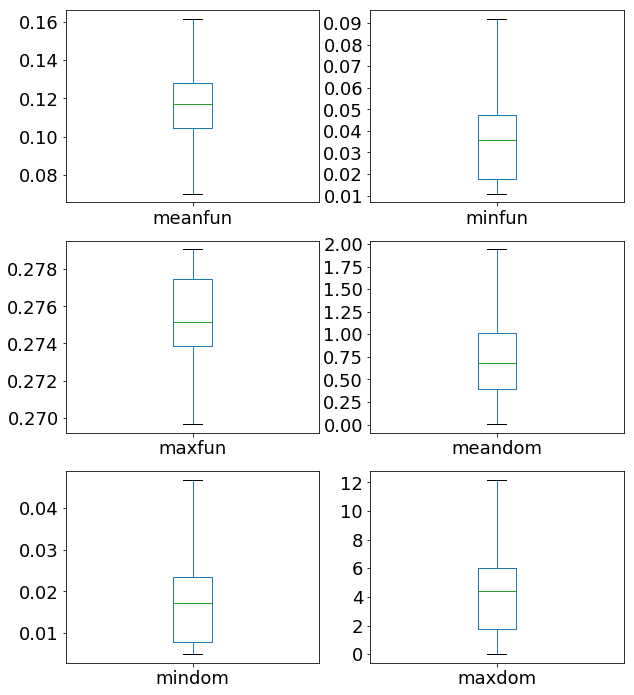

In [41]:
plt.rcParams['figure.figsize'] = (10,12)
dfHomens[colunas[12:18]].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,fontsize=18)
plt.show()

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


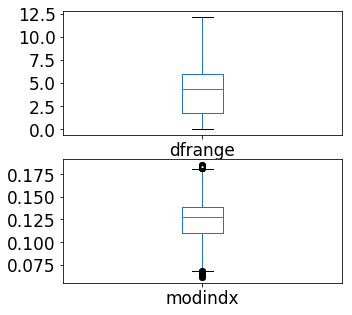

In [42]:
print(colunas)
plt.rcParams['figure.figsize'] = (5,5)
dfHomens[colunas[18:20]].plot(kind='box', subplots=True, layout=(2,1), sharex=False, sharey=False,fontsize=17)
plt.show()


### Juntando  os dados das vozes masculinas com femininas

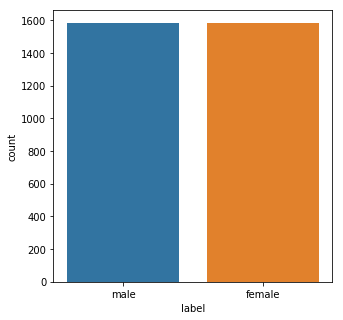

In [43]:
frames = [dfHomens,dfMulheres]
dfresult = pandas.concat(frames)
sb.countplot('label',data=dfresult)
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

### Salvando o arquivo para modelos e para Rstudio

In [44]:
dfresult.to_csv(".\\baseDados\\voice_fix.csv", header=False, index=False)
dfresult.to_csv(".\\baseDados\\Rvoice_fix.csv", header=True, index=False)



## Fim do pré-processamento
---
---
---
---
---

# Analise exploratória

In [45]:
# Carrega os dados limpos
url = ".\\baseDados\\voice_fix.csv"
colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url, names=colunas, sep = ",")


In [46]:
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.172557,0.064241,0.176893,0.121089,0.227842,0.109055,1.906048,6.450221,0.893369,0.491918,...,0.172557,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.132999,male
1,0.172557,0.067310,0.176893,0.121089,0.227842,0.109055,1.906048,6.450221,0.892193,0.513724,...,0.172557,0.107937,0.015826,0.273863,0.009014,0.007812,0.054688,0.046875,0.124688,male
2,0.172557,0.063549,0.176893,0.121089,0.227842,0.123207,1.906048,6.450221,0.918553,0.478905,...,0.172557,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.124688,male
3,0.151228,0.061216,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.273863,0.201497,0.007812,0.562500,0.554688,0.130223,male
4,0.135120,0.062769,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.275166,0.712812,0.007812,5.484375,5.476562,0.124688,male


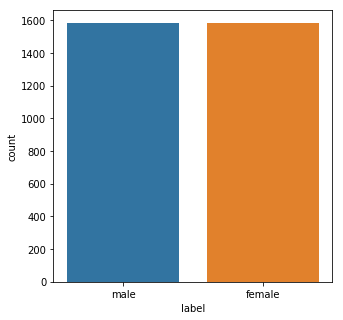

In [47]:
sb.countplot('label',data=dataset)
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

# Estatística descritiva

In [48]:
dataset.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.184297,0.054831,0.188770,0.151886,0.225699,0.074269,2.068316,7.398229,0.895832,0.408216,0.176409,0.184297,0.142831,0.035703,0.275547,0.823085,0.040827,4.922102,4.869515,0.123837
std,0.025580,0.013947,0.031509,0.036212,0.021551,0.036409,0.635557,2.746346,0.044618,0.177521,0.066646,0.025580,0.031741,0.015904,0.002264,0.516909,0.056160,3.262845,3.261824,0.023245
min,0.110311,0.018363,0.080672,0.067763,0.157750,0.014558,0.692271,2.209673,0.738651,0.036876,0.000000,0.110311,0.070249,0.009775,0.269663,0.007812,0.004883,0.007812,0.000000,0.061080
25%,0.168020,0.041967,0.172628,0.121645,0.209410,0.040331,1.661839,5.710629,0.862922,0.258041,0.147974,0.168020,0.116917,0.018223,0.273863,0.419828,0.007812,2.070312,2.044922,0.111675
50%,0.186479,0.059525,0.191252,0.149349,0.226274,0.075076,1.906048,6.450221,0.902573,0.396335,0.195616,0.186479,0.140499,0.043340,0.275166,0.759524,0.023438,4.953125,4.921875,0.125874
75%,0.199146,0.062449,0.210618,0.181927,0.243660,0.109055,2.428321,9.157991,0.928713,0.533676,0.219315,0.199146,0.169675,0.047856,0.277457,1.167568,0.023438,6.984375,6.906250,0.135265
max,0.251124,0.096062,0.261224,0.231776,0.273469,0.131996,4.124850,16.052840,0.981997,0.842936,0.280000,0.251124,0.217257,0.091743,0.279114,2.591580,0.281250,17.343750,17.320312,0.185338


In [49]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
resultado = dataset.describe()
print(resultado)

       meanfreq        sd    median       Q25       Q75       IQR      skew      kurt    sp.ent  \
count  3168.000  3168.000  3168.000  3168.000  3168.000  3168.000  3168.000  3168.000  3168.000   
mean      0.184     0.055     0.189     0.152     0.226     0.074     2.068     7.398     0.896   
std       0.026     0.014     0.032     0.036     0.022     0.036     0.636     2.746     0.045   
min       0.110     0.018     0.081     0.068     0.158     0.015     0.692     2.210     0.739   
25%       0.168     0.042     0.173     0.122     0.209     0.040     1.662     5.711     0.863   
50%       0.186     0.060     0.191     0.149     0.226     0.075     1.906     6.450     0.903   
75%       0.199     0.062     0.211     0.182     0.244     0.109     2.428     9.158     0.929   
max       0.251     0.096     0.261     0.232     0.273     0.132     4.125    16.053     0.982   

            sfm      mode  centroid   meanfun    minfun    maxfun   meandom    mindom    maxdom  \
count  31

### Rotacionando a tabela descritiva

In [50]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.184,0.026,0.110,0.168,0.186,0.199,0.251
sd,3168.0,0.055,0.014,0.018,0.042,0.060,0.062,0.096
median,3168.0,0.189,0.032,0.081,0.173,0.191,0.211,0.261
Q25,3168.0,0.152,0.036,0.068,0.122,0.149,0.182,0.232
Q75,3168.0,0.226,0.022,0.158,0.209,0.226,0.244,0.273
IQR,3168.0,0.074,0.036,0.015,0.040,0.075,0.109,0.132
skew,3168.0,2.068,0.636,0.692,1.662,1.906,2.428,4.125
kurt,3168.0,7.398,2.746,2.210,5.711,6.450,9.158,16.053
sp.ent,3168.0,0.896,0.045,0.739,0.863,0.903,0.929,0.982
sfm,3168.0,0.408,0.178,0.037,0.258,0.396,0.534,0.843


In [51]:
print(dataset.describe().transpose())

           count   mean    std    min    25%    50%    75%     max
meanfreq  3168.0  0.184  0.026  0.110  0.168  0.186  0.199   0.251
sd        3168.0  0.055  0.014  0.018  0.042  0.060  0.062   0.096
median    3168.0  0.189  0.032  0.081  0.173  0.191  0.211   0.261
Q25       3168.0  0.152  0.036  0.068  0.122  0.149  0.182   0.232
Q75       3168.0  0.226  0.022  0.158  0.209  0.226  0.244   0.273
IQR       3168.0  0.074  0.036  0.015  0.040  0.075  0.109   0.132
skew      3168.0  2.068  0.636  0.692  1.662  1.906  2.428   4.125
kurt      3168.0  7.398  2.746  2.210  5.711  6.450  9.158  16.053
sp.ent    3168.0  0.896  0.045  0.739  0.863  0.903  0.929   0.982
sfm       3168.0  0.408  0.178  0.037  0.258  0.396  0.534   0.843
mode      3168.0  0.176  0.067  0.000  0.148  0.196  0.219   0.280
centroid  3168.0  0.184  0.026  0.110  0.168  0.186  0.199   0.251
meanfun   3168.0  0.143  0.032  0.070  0.117  0.140  0.170   0.217
minfun    3168.0  0.036  0.016  0.010  0.018  0.043  0.048   0

### Nos dados existe apenas um variável *label* que é  Qualitativa Nominal sendo que demais são quantitativas contínuas

In [52]:

dataset.dtypes
A = str(tipos)
A = A.replace('float64',"Quantitativa Contínua")
A = A.replace('object',"Qualitativa Nominal")

print(A)


meanfreq    Quantitativa Contínua
sd          Quantitativa Contínua
median      Quantitativa Contínua
Q25         Quantitativa Contínua
Q75         Quantitativa Contínua
IQR         Quantitativa Contínua
skew        Quantitativa Contínua
kurt        Quantitativa Contínua
sp.ent      Quantitativa Contínua
sfm         Quantitativa Contínua
mode        Quantitativa Contínua
centroid    Quantitativa Contínua
meanfun     Quantitativa Contínua
minfun      Quantitativa Contínua
maxfun      Quantitativa Contínua
meandom     Quantitativa Contínua
mindom      Quantitativa Contínua
maxdom      Quantitativa Contínua
dfrange     Quantitativa Contínua
modindx     Quantitativa Contínua
label        Qualitativa Nominal
dtype: Qualitativa Nominal


## MEDIDAS DE POSIÇÃO: Moda, Média, Mediana, Percentis, Quartis.

#### MEDIDAS DE POSIÇÃO, já  estão calculados na tabela *describe* Media , Percentis, Quartis 
##### Mediana e a mesma medias da coluna  **50%** da tabela.

A média é uma medida de tendência central que indica o valor onde estão concentrados os dados de um conjunto de valores, representando um valor significativo para o mesmo.

A mediana é o valor que separa a metade superior da metade inferior de uma distribuição de dados, ou o valor no centro da distribuição.

A moda é simples. Nada mais é que o valor que mais se repete dentro de um conjunto.

## Calculando a moda.

### Moda

In [53]:
Modadic = {}
Medianaadic = {}
for x in colunas:
    if x == "label":
        continue
    Modadic[x]=dataset[x].mode()[0]
    Medianaadic[x]=dataset[x].median()

    
    

In [54]:
### Calculado a moda  e armazenando em dicionário.

In [55]:
print(Modadic)
print(Medianaadic)


{'meanfreq': 0.19472718236502165, 'sd': 0.061608105708484566, 'median': 0.20054250178697985, 'Q25': 0.1819274845526179, 'Q75': 0.22784220505424035, 'IQR': 0.041269320645700366, 'skew': 1.9060477321644864, 'kurt': 6.450221192869066, 'sp.ent': 0.9184162126645676, 'sfm': 0.0849343635514977, 'mode': 0.20183441212714168, 'centroid': 0.19472718236502165, 'meanfun': 0.11577965623313086, 'minfun': 0.0469208211143695, 'maxfun': 0.2738630053699619, 'meandom': 0.0078125, 'mindom': 0.0234375, 'maxdom': 0.0078125, 'dfrange': 0.0, 'modindx': 0.13393144660271078}
{'meanfreq': 0.18647868939908246, 'sd': 0.0595253461221969, 'median': 0.19125166792965048, 'Q25': 0.149349342481418, 'Q75': 0.226274112408729, 'IQR': 0.07507567046154351, 'skew': 1.9060477321644864, 'kurt': 6.450221192869066, 'sp.ent': 0.902573495041479, 'sfm': 0.396335156832049, 'mode': 0.195616438356164, 'centroid': 0.18647868939908246, 'meanfun': 0.14049944322543, 'minfun': 0.043340334680360554, 'maxfun': 0.2751664350544543, 'meandom': 0.

In [56]:
### Transformando  os resultados em data frame.


In [57]:
dfModa = pandas.DataFrame.from_dict(Modadic, orient="index").reset_index()
dfModa.columns = ["quantitativas","moda"]
dfModa

,quantitativas,moda
0,meanfreq,0.195
1,sd,0.062
2,median,0.201
3,Q25,0.182
4,Q75,0.228
5,IQR,0.041
6,skew,1.906
7,kurt,6.450
8,sp.ent,0.918
9,sfm,0.085


In [58]:
dfmediana = pandas.DataFrame.from_dict(Medianaadic, orient="index").reset_index()
dfmediana.columns = ["quantitativas","mediana"]
dfmediana.head()

,quantitativas,mediana
0,meanfreq,0.186
1,sd,0.060
2,median,0.191
3,Q25,0.149
4,Q75,0.226


In [59]:
### usado para unir os dataframes.
df50porcento = pandas.DataFrame.from_dict(Medianaadic, orient="index").reset_index()
df50porcento.columns = ["quantitativas","50%"]
df50porcento.head()


,quantitativas,50%
0,meanfreq,0.186
1,sd,0.060
2,median,0.191
3,Q25,0.149
4,Q75,0.226


In [60]:

dfmediaModa=pandas.merge(dfModa,dfmediana,how='left',on='quantitativas')
dfmediaModa=pandas.merge(dfmediaModa,df50porcento,how='left',on='quantitativas')

In [61]:
print(dfmediaModa)

   quantitativas   moda  mediana    50%
0       meanfreq  0.195    0.186  0.186
1             sd  0.062    0.060  0.060
2         median  0.201    0.191  0.191
3            Q25  0.182    0.149  0.149
4            Q75  0.228    0.226  0.226
5            IQR  0.041    0.075  0.075
6           skew  1.906    1.906  1.906
7           kurt  6.450    6.450  6.450
8         sp.ent  0.918    0.903  0.903
9            sfm  0.085    0.396  0.396
10          mode  0.202    0.196  0.196
11      centroid  0.195    0.186  0.186
12       meanfun  0.116    0.140  0.140
13        minfun  0.047    0.043  0.043
14        maxfun  0.274    0.275  0.275
15       meandom  0.008    0.760  0.760
16        mindom  0.023    0.023  0.023
17        maxdom  0.008    4.953  4.953
18       dfrange  0.000    4.922  4.922
19       modindx  0.134    0.126  0.126


MEDIDAS DE DISPERSÃO: Amplitude, Intervalo-Interquartil, Variância, Desvio Padrão, Coeficiente de Variação.
Finalidade: encontrar um valor que resuma a variabilidade de um conjunto de dados
A amplitude nada mais é do que a diferença entre o maior e o menor valor de um conjunto de dados. A variância é uma medida que expressa quanto os dados de um conjunto estão afastados de seu valor esperado. O desvio padrão também é uma medida de dispersão, que indica quanto os dados estão afastados da média.

O coeficiente de variação é usado para expressar a variabilidade dos dados estatísticos excluindo a influência da ordem de grandeza da variável.

## Amplitude.

In [62]:
print(dataset['meanfreq'].max() - dataset['meanfreq'].min())

0.14081306990041098


## Variância.

In [63]:
print(dataset['meanfreq'].var())

0.0006543292219937714


O cálculo do coeficiente de variação é feito através da fórmula:

 cv/



Onde,
 s ? é o desvio padrão
X ? ? é a média dos dados
CV ? é o coeficiente de variação

<img style="-webkit-user-select: none;margin: auto;" src="https://static.mundoeducacao.bol.uol.com.br/mundoeducacao/conteudo/coefvariacao.jpg">





## Coeficiente de Variação.

In [64]:
print(   (dataset['meanfreq'].std()/dataset['meanfreq'].mean()) *  100      )

13.879693499114708


## Intervalo-Interquartil.
É a diferença entre o terceiro quartil e o primeiro
quartil, ou seja,
d= Q3-Q1



In [65]:
print(dataset['meanfreq'].quantile(q=0.75))

0.1991460508962063


In [66]:
print(dataset['meanfreq'].quantile(q=0.25))


0.16801958856648527


In [67]:
print(dataset['meanfreq'].quantile(q=0.75) - dataset['meanfreq'].quantile(q=0.25))

0.031126462329721022


### Operando todos os cálculos: Amplitude, Variância, Coeficiente de Variação e Intervalo-Interquartil.

In [68]:

Amplitudedic = {}
Varianciadic = {}
CoeficienteVardic = {}
IntervaloInterquartildic = {}
for x in colunas:
    if x == "label":
        continue
    Amplitudedic[x]=dataset[x].max() - dataset[x].min()
    Varianciadic[x] = dataset[x].var()
    CoeficienteVardic[x] = (dataset[x].std()/dataset[x].mean()) *  100
    IntervaloInterquartildic[x] = dataset[x].quantile(q=0.75) - dataset[x].quantile(q=0.25)
    


### Transformando os resultados em dataframe.

In [69]:
dfAmplitude = pandas.DataFrame.from_dict(Amplitudedic, orient="index").reset_index()
dfAmplitude.columns = ["quantitativas","Amplitude"]
dfAmplitude.head()

,quantitativas,Amplitude
0,meanfreq,0.141
1,sd,0.078
2,median,0.181
3,Q25,0.164
4,Q75,0.116


In [70]:
dfVariancia = pandas.DataFrame.from_dict(Varianciadic, orient="index").reset_index()
dfVariancia.columns = ["quantitativas","Variancia"]
dfVariancia.head()

,quantitativas,Variancia
0,meanfreq,6.543e-04
1,sd,1.945e-04
2,median,9.928e-04
3,Q25,1.311e-03
4,Q75,4.645e-04


In [71]:
dfCoeficiente = pandas.DataFrame.from_dict(CoeficienteVardic, orient="index").reset_index()
dfCoeficiente.columns = ["quantitativas","Coef_Var_%"]
dfCoeficiente.head()

,quantitativas,Coef_Var_%
0,meanfreq,13.880
1,sd,25.437
2,median,16.692
3,Q25,23.842
4,Q75,9.549


In [72]:
IntervaloInterquartil = pandas.DataFrame.from_dict(IntervaloInterquartildic, orient="index").reset_index()
IntervaloInterquartil.columns = ["quantitativas","Intervalo_Interquartil"]
IntervaloInterquartil.head()

,quantitativas,Intervalo_Interquartil
0,meanfreq,0.031
1,sd,0.020
2,median,0.038
3,Q25,0.060
4,Q75,0.034


## Mesclando os resultados.

In [73]:
dfresultado_frame=pandas.merge(dfAmplitude,dfVariancia,how='right',on='quantitativas')
dfresultado_frame=pandas.merge(dfresultado_frame,dfCoeficiente,how='right',on='quantitativas')
dfresultado_frame=pandas.merge(dfresultado_frame,IntervaloInterquartil,how='right',on='quantitativas')
print(dfresultado_frame)
dfresultado_frame


   quantitativas  Amplitude  Variancia  Coef_Var_%  Intervalo_Interquartil
0       meanfreq      0.141  6.543e-04      13.880                   0.031
1             sd      0.078  1.945e-04      25.437                   0.020
2         median      0.181  9.928e-04      16.692                   0.038
3            Q25      0.164  1.311e-03      23.842                   0.060
4            Q75      0.116  4.645e-04       9.549                   0.034
5            IQR      0.117  1.326e-03      49.023                   0.069
6           skew      3.433  4.039e-01      30.728                   0.766
7           kurt     13.843  7.542e+00      37.122                   3.447
8         sp.ent      0.243  1.991e-03       4.981                   0.066
9            sfm      0.806  3.151e-02      43.487                   0.276
10          mode      0.280  4.442e-03      37.779                   0.071
11      centroid      0.141  6.543e-04      13.880                   0.031
12       meanfun      0.1

,quantitativas,Amplitude,Variancia,Coef_Var_%,Intervalo_Interquartil
0,meanfreq,0.141,6.543e-04,13.880,0.031
1,sd,0.078,1.945e-04,25.437,0.020
2,median,0.181,9.928e-04,16.692,0.038
3,Q25,0.164,1.311e-03,23.842,0.060
4,Q75,0.116,4.645e-04,9.549,0.034
5,IQR,0.117,1.326e-03,49.023,0.069
6,skew,3.433,4.039e-01,30.728,0.766
7,kurt,13.843,7.542e+00,37.122,3.447
8,sp.ent,0.243,1.991e-03,4.981,0.066
9,sfm,0.806,3.151e-02,43.487,0.276


## Mesclando os resultados com tabela de resumo estatístico.

In [74]:
dados_estatisticos = dataset.describe().transpose()
dados_estatisticos=pandas.merge(dfmediaModa,dados_estatisticos,how='right',on='50%')
print(dados_estatisticos)
dados_estatisticos


dados_estatisticos=pandas.merge(dados_estatisticos,dfresultado_frame,how='right',on='quantitativas')
#dados_estatisticos[[quantitativas]]
#dados_estatisticos = dados_estatisticos.drop_duplicates()
print(dados_estatisticos)
#dados_estatisticos = dados_estatisticos[["quantitativas"]]
#print(dados_estatisticos)
dados_estatisticos

   quantitativas   moda  mediana    50%   count   mean    std    min    25%    75%     max
0       meanfreq  0.195    0.186  0.186  3168.0  0.184  0.026  0.110  0.168  0.199   0.251
1       centroid  0.195    0.186  0.186  3168.0  0.184  0.026  0.110  0.168  0.199   0.251
2       meanfreq  0.195    0.186  0.186  3168.0  0.184  0.026  0.110  0.168  0.199   0.251
3       centroid  0.195    0.186  0.186  3168.0  0.184  0.026  0.110  0.168  0.199   0.251
4             sd  0.062    0.060  0.060  3168.0  0.055  0.014  0.018  0.042  0.062   0.096
5         median  0.201    0.191  0.191  3168.0  0.189  0.032  0.081  0.173  0.211   0.261
6            Q25  0.182    0.149  0.149  3168.0  0.152  0.036  0.068  0.122  0.182   0.232
7            Q75  0.228    0.226  0.226  3168.0  0.226  0.022  0.158  0.209  0.244   0.273
8            IQR  0.041    0.075  0.075  3168.0  0.074  0.036  0.015  0.040  0.109   0.132
9           skew  1.906    1.906  1.906  3168.0  2.068  0.636  0.692  1.662  2.428   4.125

,quantitativas,moda,mediana,50%,count,mean,std,min,25%,75%,max,Amplitude,Variancia,Coef_Var_%,Intervalo_Interquartil
0,meanfreq,0.195,0.186,0.186,3168.0,0.184,0.026,0.110,0.168,0.199,0.251,0.141,6.543e-04,13.880,0.031
1,meanfreq,0.195,0.186,0.186,3168.0,0.184,0.026,0.110,0.168,0.199,0.251,0.141,6.543e-04,13.880,0.031
2,centroid,0.195,0.186,0.186,3168.0,0.184,0.026,0.110,0.168,0.199,0.251,0.141,6.543e-04,13.880,0.031
3,centroid,0.195,0.186,0.186,3168.0,0.184,0.026,0.110,0.168,0.199,0.251,0.141,6.543e-04,13.880,0.031
4,sd,0.062,0.060,0.060,3168.0,0.055,0.014,0.018,0.042,0.062,0.096,0.078,1.945e-04,25.437,0.020
5,median,0.201,0.191,0.191,3168.0,0.189,0.032,0.081,0.173,0.211,0.261,0.181,9.928e-04,16.692,0.038
6,Q25,0.182,0.149,0.149,3168.0,0.152,0.036,0.068,0.122,0.182,0.232,0.164,1.311e-03,23.842,0.060
7,Q75,0.228,0.226,0.226,3168.0,0.226,0.022,0.158,0.209,0.244,0.273,0.116,4.645e-04,9.549,0.034
8,IQR,0.041,0.075,0.075,3168.0,0.074,0.036,0.015,0.040,0.109,0.132,0.117,1.326e-03,49.023,0.069
9,skew,1.906,1.906,1.906,3168.0,2.068,0.636,0.692,1.662,2.428,4.125,3.433,4.039e-01,30.728,0.766


---
---
---
---
---
---

# ORGANIZAÇÃO E APRESENTAÇÃO DOS DADOS
Tabela de frequência: relaciona categorias (ou classes) de valores, juntamente  a com contagem (ou frequências) do número de valores se enquadram em cada categoria ou classe.
## Variáveis qualitativas:
#### Temos apenas uma classe qualitativa a variável *label* fazendo a análise:
Tamanho do dataset.

In [75]:
print(dataset.shape)

(3168, 21)


Agrupar pela variável label.

In [76]:
contagem = dataset.groupby('label').size()
print(contagem)

label
female    1584
male      1584
dtype: int64


 #### Calculando a frequência relativa. fr =fi / n ou seja contagem por classe sobre total somada dos valores de cada classe.

In [77]:

total=3168
freqFRsexodic={}
freqFRsexodic['female']=   contagem[['female']][0] / total
freqFRsexodic['male']=    contagem[['male']][0] / total
freqFRsexodic['Total']=   (  contagem[['female']][0] / total ) + (  contagem[['male']][0] / total)

In [78]:
freqFRsexodic

{'female': 0.5, 'male': 0.5, 'Total': 1.0}

 #### Calculando a  Frequência relativa percentual da categoria. fri% = fri * 100

In [79]:
freqFRpcsexodic={}
freqFRpcsexodic['female']=   freqFRsexodic['female'] * 100
freqFRpcsexodic['male']=    freqFRsexodic['male']  * 100
freqFRpcsexodic['Total']=  freqFRsexodic['Total']  * 100

In [80]:
freqsexodic={}
freqsexodic['female']=contagem[['female']][0]
freqsexodic['male']=contagem[['male']][0]
freqsexodic['Total']=total

### Montado o dataframe com os resultados.

In [81]:
dffrequenciaSexo = pandas.DataFrame.from_dict(freqsexodic, orient="index").reset_index()
dffrequenciaSexo.columns = ["qualitativas","contagem"]


In [82]:

dffrequenciaSexoFR = pandas.DataFrame.from_dict(freqFRsexodic, orient="index").reset_index()
dffrequenciaSexoFR.columns = ["qualitativas","freqRelativa"]

In [83]:
dffrequenciaSexoFRpc = pandas.DataFrame.from_dict(freqFRpcsexodic, orient="index").reset_index()
dffrequenciaSexoFRpc.columns = ["qualitativas","freqRelativa%"]

In [84]:
dftabelaFreqQualitativas=pandas.merge(dffrequenciaSexo,dffrequenciaSexoFR,how='right',on='qualitativas')
dftabelaFreqQualitativas=pandas.merge(dftabelaFreqQualitativas,dffrequenciaSexoFRpc,how='right',on='qualitativas')

In [85]:
dftabelaFreqQualitativas

,qualitativas,contagem,freqRelativa,freqRelativa%
0,female,1584,0.5,50.0
1,male,1584,0.5,50.0
2,Total,3168,1.0,100.0


In [86]:
print(dftabelaFreqQualitativas)

  qualitativas  contagem  freqRelativa  freqRelativa%
0       female      1584           0.5           50.0
1         male      1584           0.5           50.0
2        Total      3168           1.0          100.0


---
---
---
---
---



# Comparativo dos dados.

In [87]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from pandas.tools.plotting import scatter_matrix
from  pandas.plotting  import scatter_matrix
import seaborn as sb

In [88]:
# Carrega os dados limpos
url = ".\\baseDados\\voice_fix.csv"
colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url, names=colunas, sep = ",")

In [89]:
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.173,0.064,0.177,0.121,0.228,0.109,1.906,6.450,0.893,0.492,...,0.173,0.084,0.016,0.276,0.008,0.008,0.008,0.000,0.133,male
1,0.173,0.067,0.177,0.121,0.228,0.109,1.906,6.450,0.892,0.514,...,0.173,0.108,0.016,0.274,0.009,0.008,0.055,0.047,0.125,male
2,0.173,0.064,0.177,0.121,0.228,0.123,1.906,6.450,0.919,0.479,...,0.173,0.099,0.016,0.271,0.008,0.008,0.016,0.008,0.125,male
3,0.151,0.061,0.158,0.097,0.208,0.111,1.233,4.177,0.963,0.727,...,0.151,0.089,0.018,0.274,0.201,0.008,0.562,0.555,0.130,male
4,0.135,0.063,0.125,0.079,0.206,0.127,1.101,4.334,0.972,0.784,...,0.135,0.106,0.017,0.275,0.713,0.008,5.484,5.477,0.125,male


In [90]:

dfHomens = dataset[dataset["label"] == "male"]
dfMuheres = dataset[dataset["label"] == "female"]

In [91]:
dfHomens.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.173,0.064,0.177,0.121,0.228,0.109,1.906,6.450,0.893,0.492,...,0.173,0.084,0.016,0.276,0.008,0.008,0.008,0.000,0.133,male
1,0.173,0.067,0.177,0.121,0.228,0.109,1.906,6.450,0.892,0.514,...,0.173,0.108,0.016,0.274,0.009,0.008,0.055,0.047,0.125,male
2,0.173,0.064,0.177,0.121,0.228,0.123,1.906,6.450,0.919,0.479,...,0.173,0.099,0.016,0.271,0.008,0.008,0.016,0.008,0.125,male
3,0.151,0.061,0.158,0.097,0.208,0.111,1.233,4.177,0.963,0.727,...,0.151,0.089,0.018,0.274,0.201,0.008,0.562,0.555,0.130,male
4,0.135,0.063,0.125,0.079,0.206,0.127,1.101,4.334,0.972,0.784,...,0.135,0.106,0.017,0.275,0.713,0.008,5.484,5.477,0.125,male


In [92]:
dfMuheres.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1584,0.158,0.083,0.191,0.182,0.225,0.041,2.801,9.346,0.952,0.679,...,0.158,0.185,0.023,0.276,0.273,0.047,0.742,0.695,0.134,female
1585,0.183,0.068,0.201,0.175,0.226,0.051,3.002,9.346,0.910,0.506,...,0.183,0.160,0.019,0.276,0.259,0.055,0.805,0.750,0.130,female
1586,0.200,0.062,0.211,0.184,0.236,0.051,2.544,14.922,0.904,0.425,...,0.200,0.156,0.016,0.276,0.250,0.055,0.898,0.844,0.134,female
1587,0.195,0.072,0.205,0.181,0.256,0.040,2.392,10.061,0.907,0.524,...,0.195,0.183,0.025,0.276,0.270,0.055,0.703,0.648,0.134,female
1588,0.209,0.058,0.220,0.190,0.250,0.059,1.708,5.671,0.880,0.344,...,0.209,0.162,0.017,0.276,0.261,0.055,0.812,0.758,0.130,female


# Gráfico comparativo com valores máximos.

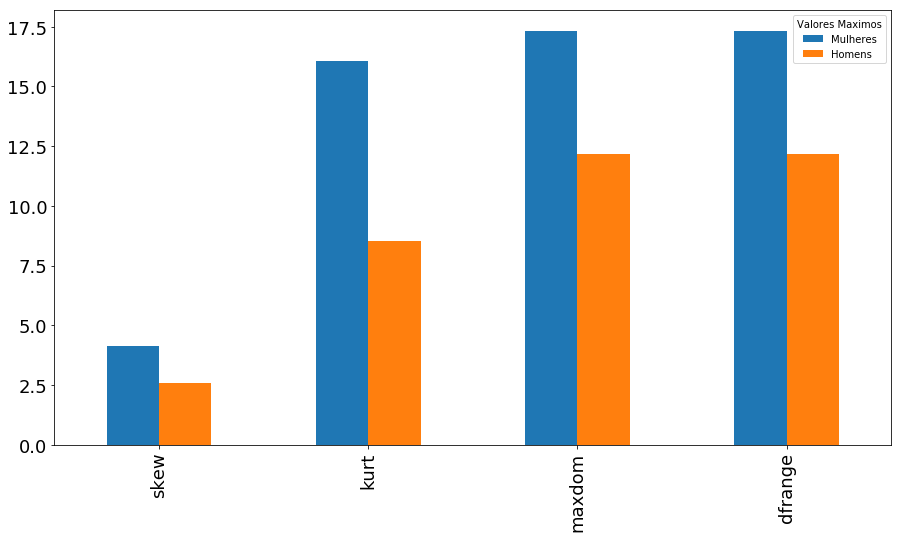

In [93]:

DadosMax = []
for x in colunas:
    if x in ["label"]:
        continue
    if x in ["label","meanfreq","sd","median","Q25","Q75","IQR"]:
        continue
    if x in ["sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","modindx"]:
        continue
   # if x in ["skew","kurt","maxdom","dfrange"]:
   #     continue
        
        
    Linha =[]
    Linha.append(dfMuheres[x].max())
    Linha.append(dfHomens[x].max())
    DadosMax.append(Linha)
    
df = pd.DataFrame(DadosMax, 
                  index=["skew","kurt","maxdom","dfrange"],
                  columns=pd.Index(['Mulheres', 'Homens'], 
                 name='Valores Maximos')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)



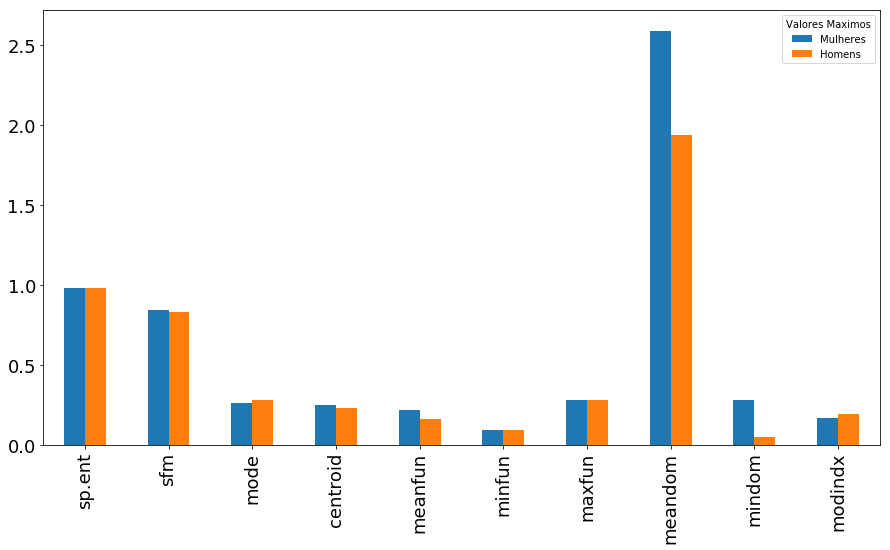

In [94]:
DadosMax = []
for x in colunas:
    if x in ["label"]:
        continue
    if x in ["label","meanfreq","sd","median","Q25","Q75","IQR"]:
        continue
   # if x in ["sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","modindx"]:
    #    continue
    if x in ["skew","kurt","maxdom","dfrange"]:
        continue
        
        
    Linha =[]
    Linha.append(dfMuheres[x].max())
    Linha.append(dfHomens[x].max())
    DadosMax.append(Linha)
    
df = pd.DataFrame(DadosMax, 
                  index=["sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","modindx"],
                  columns=pd.Index(['Mulheres', 'Homens'], 
                 name='Valores Maximos')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)

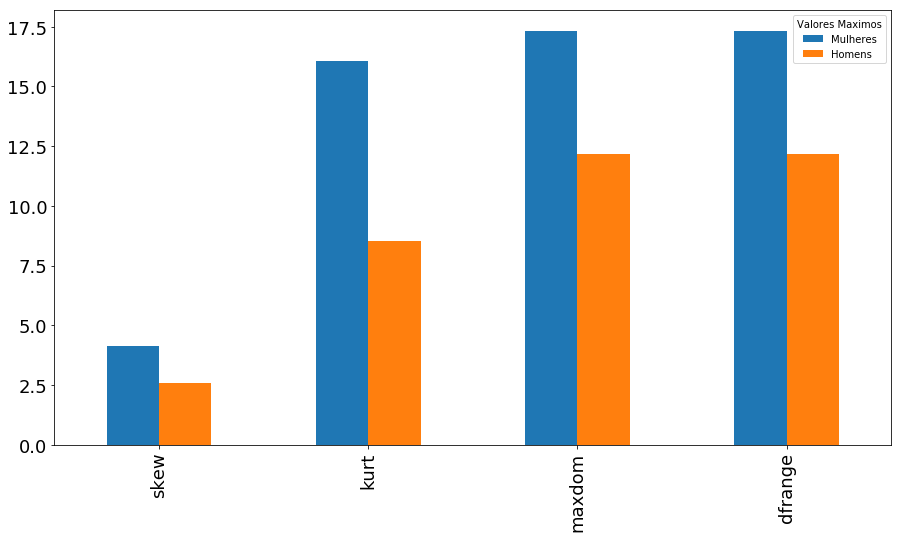

In [95]:
DadosMax = []
for x in colunas:
    if x in ["label"]:
        continue
    if x in ["label","meanfreq","sd","median","Q25","Q75","IQR"]:
        continue
    if x in ["sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","modindx"]:
        continue
    #if x in ["skew","kurt","maxdom","dfrange"]:
     #   continue
        
        
    Linha =[]
    Linha.append(dfMuheres[x].max())
    Linha.append(dfHomens[x].max())
    DadosMax.append(Linha)
    
df = pd.DataFrame(DadosMax, 
                  index=["skew","kurt","maxdom","dfrange"],
                  columns=pd.Index(['Mulheres', 'Homens'], 
                 name='Valores Maximos')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)

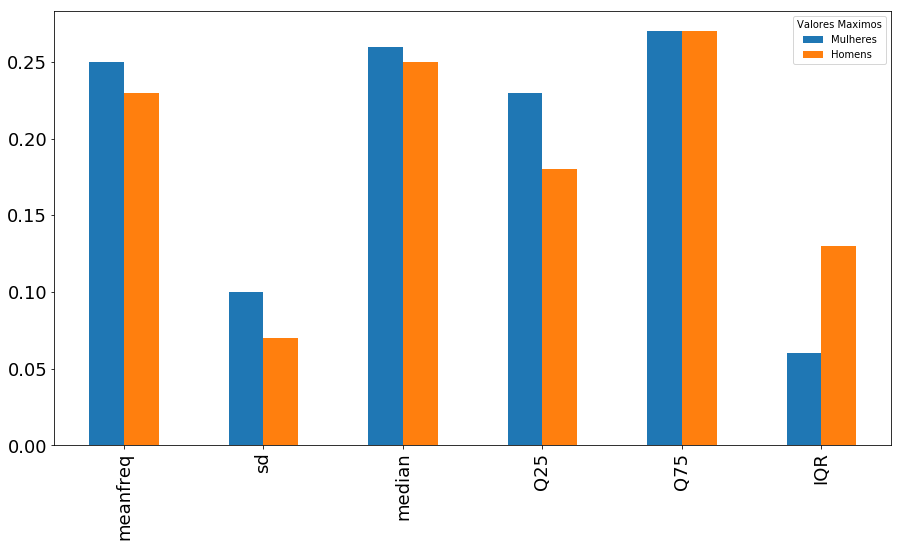

In [96]:

DadosMax = []
for x in colunas:
    if x in ["label"]:
        continue
    #if x in ["meanfreq","sd","median","Q25","Q75","IQR"]:
   #     continue
    if x in ["sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","modindx"]:
        continue
    if x in ["skew","kurt","maxdom","dfrange"]:
        continue
        
        
    Linha =[]
    Linha.append(dfMuheres[x].max())
    Linha.append(dfHomens[x].max())
    DadosMax.append(Linha)
    
df = pd.DataFrame(DadosMax, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR"],
                  columns=pd.Index(['Mulheres', 'Homens'], 
                 name='Valores Maximos')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)

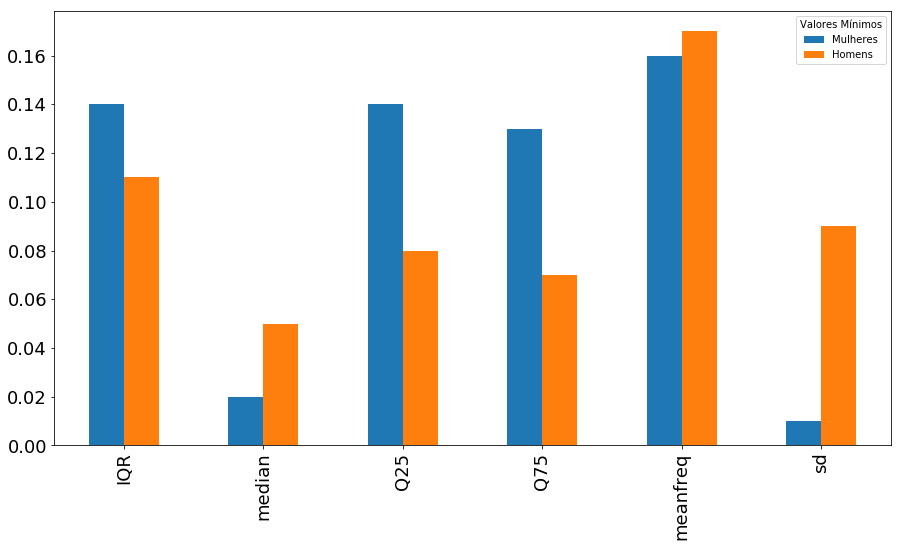

In [97]:
DadosMin = []
for x in colunas:
    if x == "label":
        continue
        
        
        
    if x in ["label"]:
        continue
   # if x in ["IQR","median","Q25","Q75","meanfreq","sd"]:
   #     continue
    if x in ["dfrange","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","modindx","maxdom"]:
        continue
    if x in ["skew","kurt"]:
        continue
        
        
        
    Linha =[]
    Linha.append(dfMuheres[x].min())
    Linha.append(dfHomens[x].min())
    DadosMin.append(Linha)
    
    
    
df = pd.DataFrame(DadosMin, 
                  index=["IQR","median","Q25","Q75","meanfreq","sd"],
                  columns=pd.Index(['Mulheres', 'Homens'], 
                 name='Valores Mínimos')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)

---
---
---
---
---


# Gráfico comparativo com valores mínimos.

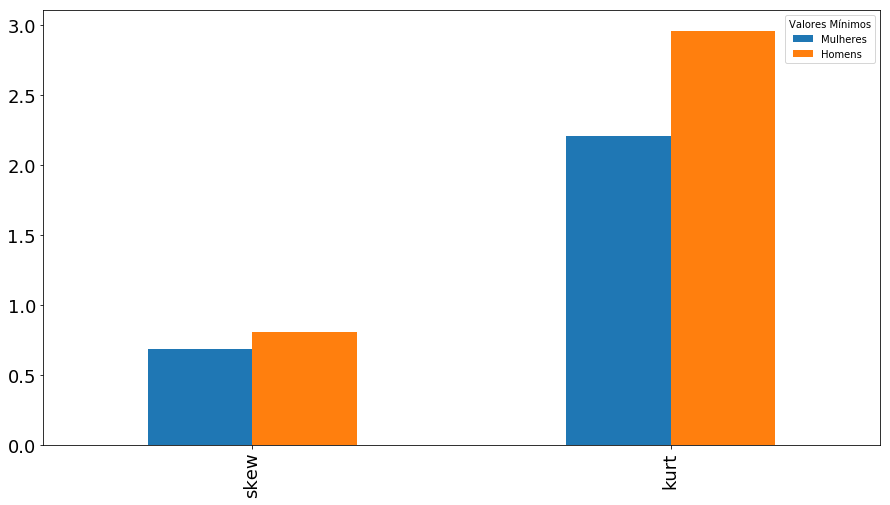

In [98]:
DadosMin = []
for x in colunas:
    if x == "label":
        continue
        
        
        
    if x in ["label"]:
        continue
    if x in ["IQR","median","Q25","Q75","meanfreq","sd"]:
        continue
    if x in ["dfrange","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","modindx","maxdom"]:
        continue
   # if x in ["skew","kurt","maxdom","dfrange"]:
       # continue
        
        
        
    Linha =[]
    Linha.append(dfMuheres[x].min())
    Linha.append(dfHomens[x].min())
    DadosMin.append(Linha)
    
    
    
df = pd.DataFrame(DadosMin, 
                  index=["skew","kurt"],
                  columns=pd.Index(['Mulheres', 'Homens'], 
                 name='Valores Mínimos')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)
    



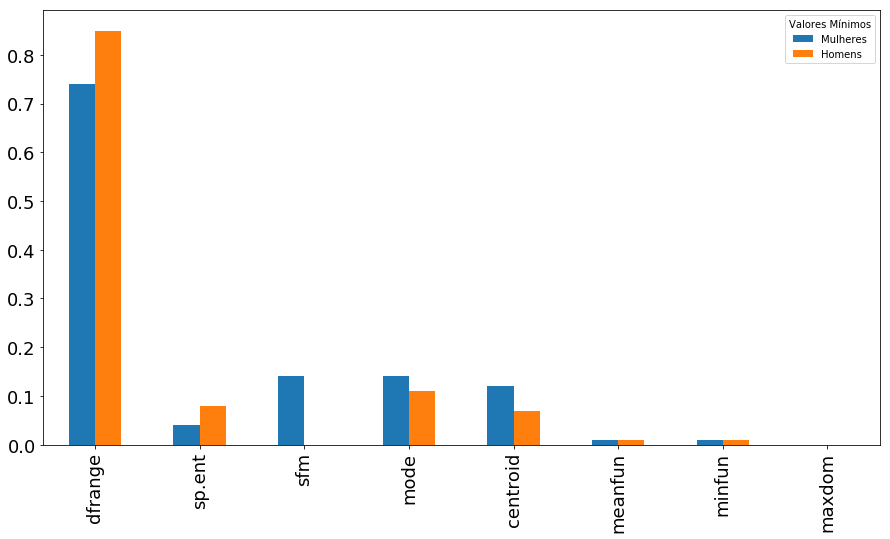

In [99]:
DadosMin = []
for x in colunas:
    if x == "label":
        continue
        
        
        
    if x in ["label"]:
        continue
    if x in ["IQR","median","Q25","Q75","meanfreq","sd"]:
        continue
   # if x in ["dfrange","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","modindx","maxdom"]:
    #    continue
    if x in ["skew","kurt","maxfun","meandom","mindom","modindx"]:
        continue
        
        
        
    Linha =[]
    Linha.append(dfMuheres[x].min())
    Linha.append(dfHomens[x].min())
    DadosMin.append(Linha)
    
    
    
df = pd.DataFrame(DadosMin, 
                  index=["dfrange","sp.ent","sfm","mode","centroid","meanfun","minfun","maxdom"],
                  columns=pd.Index(['Mulheres', 'Homens'], 
                 name='Valores Mínimos')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)

# Gráfico comparativo com valores média.

In [100]:

DadosMedia = []
for x in colunas:
    if x == "label":
        continue
    if x in ["meanfreq","sd","median","Q25","Q75","IQR","mode","centroid","meanfun","minfun","maxfun"]:
        continue
        
    Linha =[]

    Linha.append(dfMuheres[x].mean())
    Linha.append(dfHomens[x].mean())
    DadosMedia.append(Linha)



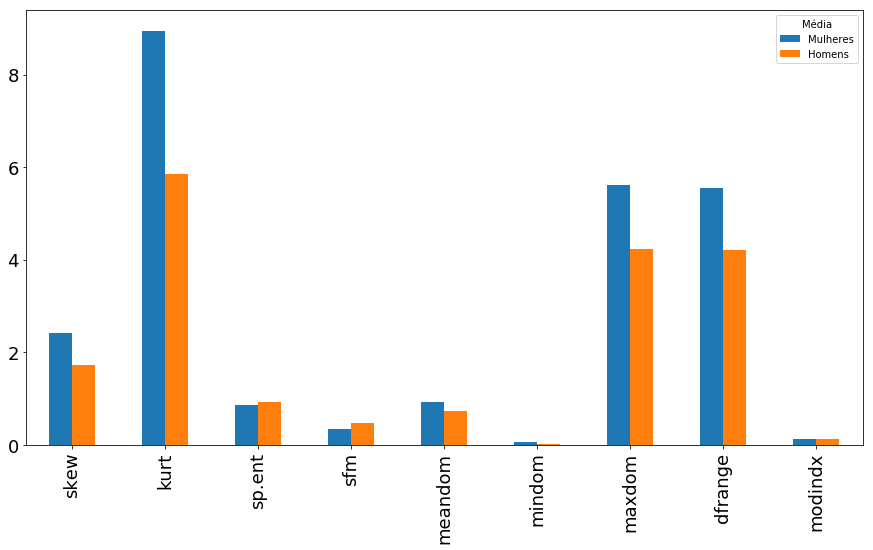

In [101]:

df = pd.DataFrame(DadosMedia, 
                  index=["skew","kurt","sp.ent","sfm","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Mulheres', 'Homens'], 
                 name='Média')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)

# Gráfico comparativo com valores mediana.

In [102]:

DadosMediana = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dfMuheres[x].quantile(q=0.50))
    Linha.append(dfHomens[x].quantile(q=0.50))
    DadosMediana.append(Linha)



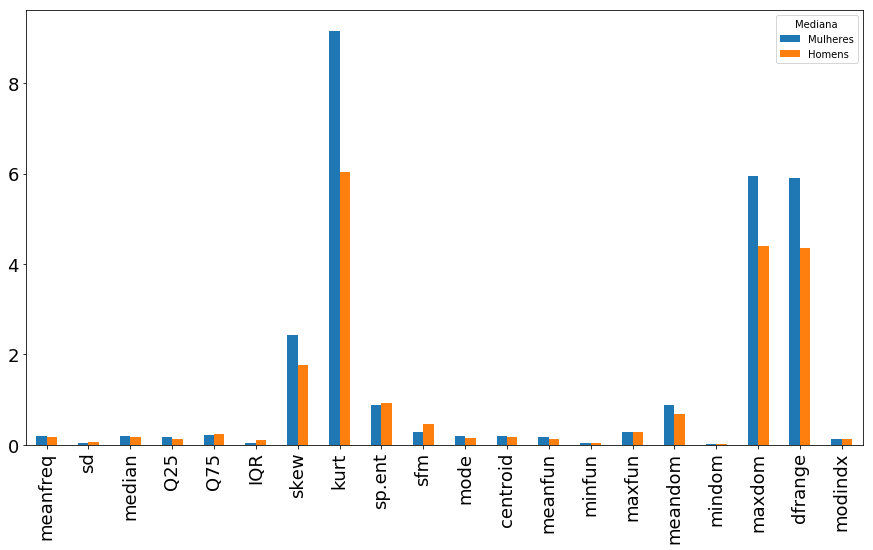

In [103]:
df = pd.DataFrame(DadosMediana, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Mulheres', 'Homens'], 
                 name='Mediana')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)


# Gráfico comparativo com valores Desvio padrão.

In [104]:
Dadosdp = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dfMuheres[x].std())
    Linha.append(dfHomens[x].std())
    Dadosdp.append(Linha)


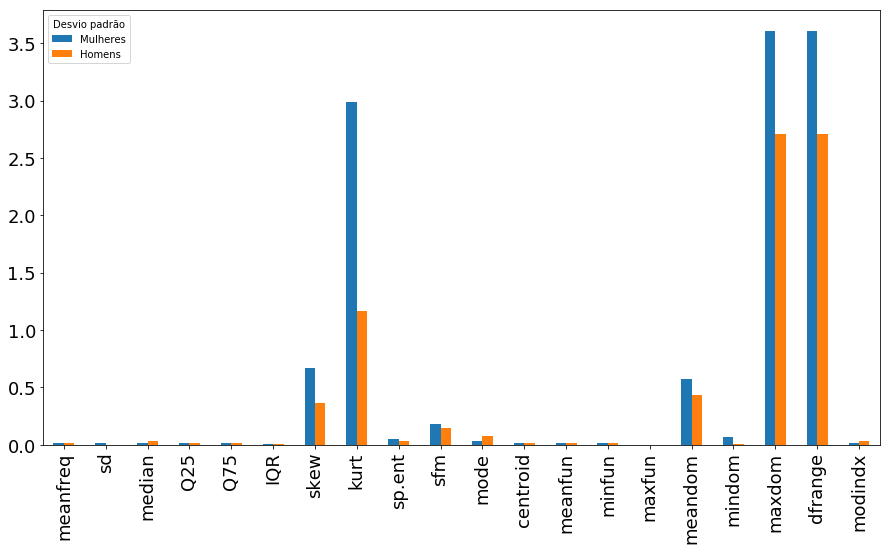

In [105]:

df = pd.DataFrame(Dadosdp, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index([ 'Mulheres', 'Homens'], 
                 name='Desvio padrão')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)

# Gráfico comparativo com valores Variância.


In [106]:
Dadosvr = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dfMuheres[x].var())
    Linha.append(dfHomens[x].var())
    Dadosvr.append(Linha)


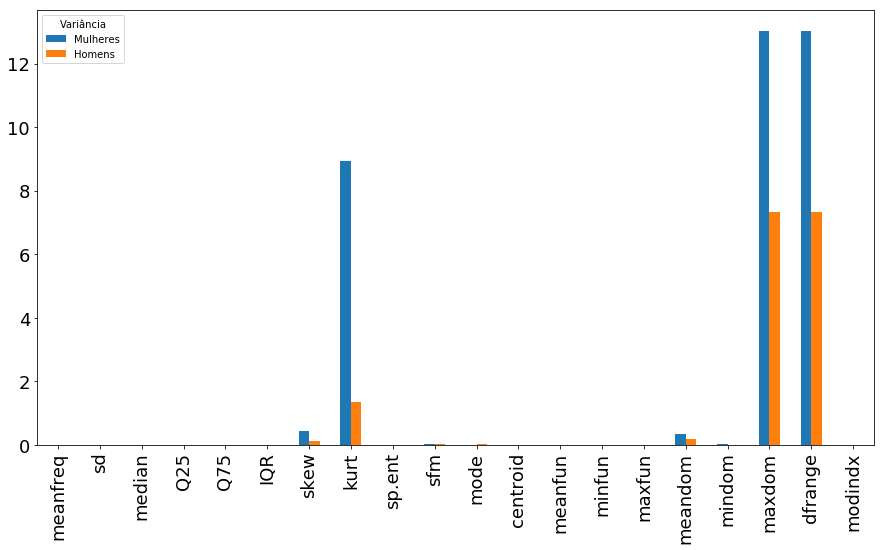

In [107]:
df = pd.DataFrame(Dadosvr, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index([ 'Mulheres', 'Homens'], 
                 name='Variância')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)


# Gráfico comparativo com valores Amplitude.

In [108]:

Dados = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    

    M=dfMuheres[x].max() - dfMuheres[x].min()
    H=dfHomens[x].max() - dfHomens[x].min()
    
    

    Linha.append(M)
    Linha.append(H)
    Dados.append(Linha)


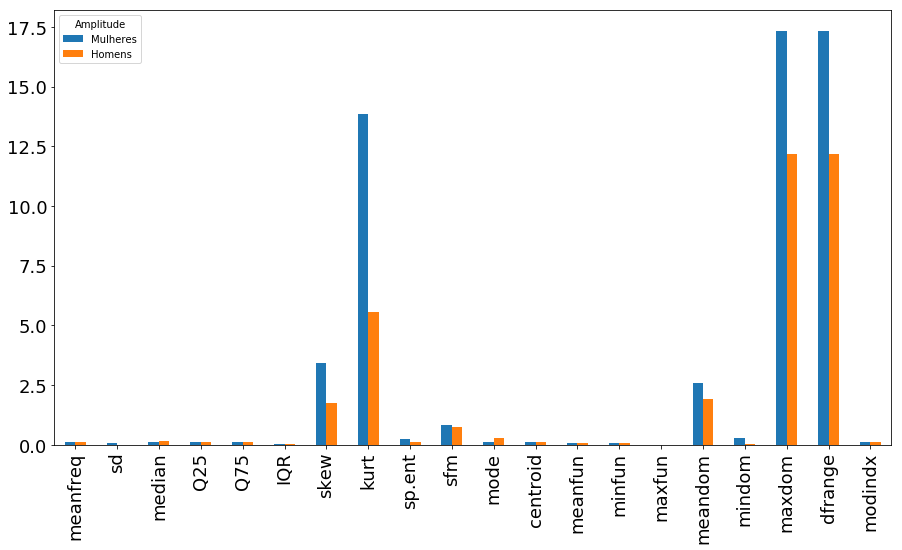

In [109]:
df = pd.DataFrame(Dados, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index([ 'Mulheres', 'Homens'], 
                 name='Amplitude')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)

# Gráfico comparativo com valores Moda.

In [110]:
Dados = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dfMuheres[x].mode()[0])
    Linha.append(dfHomens[x].mode()[0])
    Dados.append(Linha)

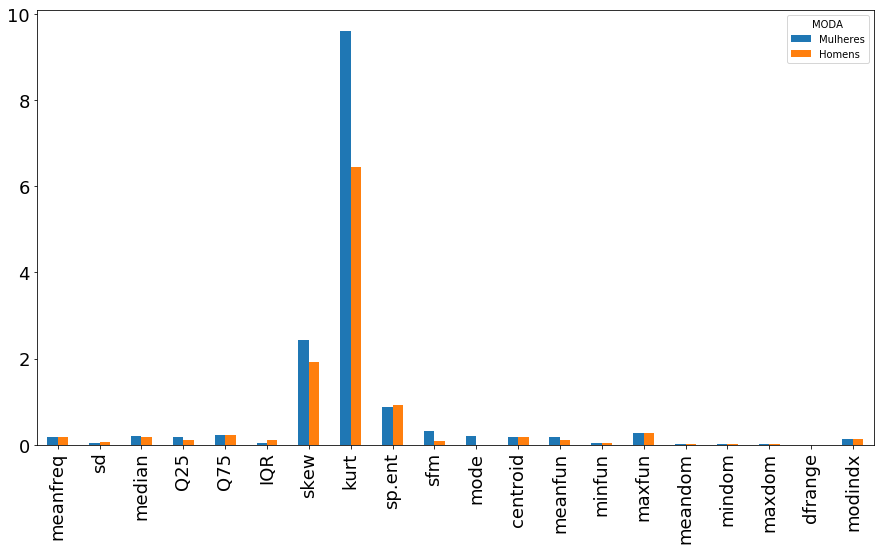

In [111]:
df = pd.DataFrame(Dados, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index([ 'Mulheres', 'Homens'], 
                 name='MODA')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)


# Gráfico comparativo com valores Coeficiente de variação.


In [112]:
Dados = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append((dfMuheres[x].std()/dfMuheres[x].mean()) *  100)
    Linha.append((dfHomens[x].std()/dfHomens[x].mean()) *  100)
    Dados.append(Linha)
    
    


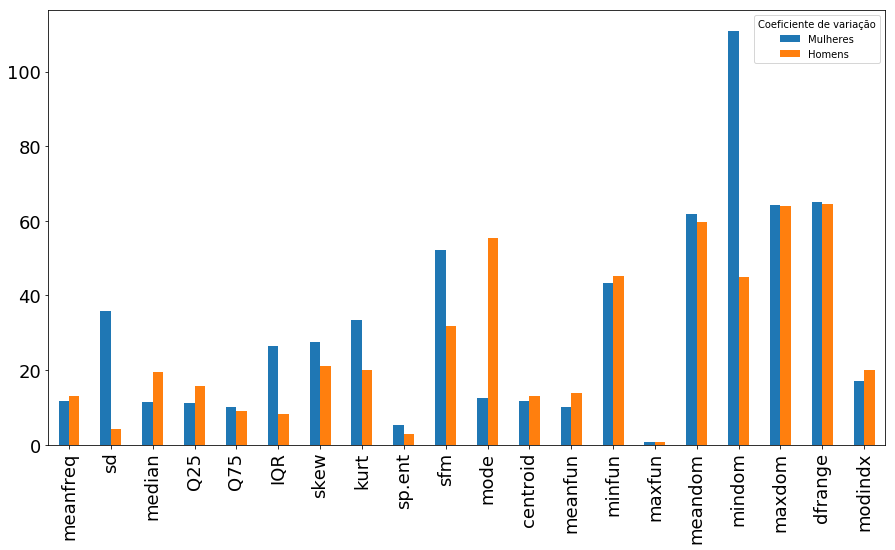

In [113]:
df = pd.DataFrame(Dados, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index([ 'Mulheres', 'Homens'], 
                 name='Coeficiente de variação')).round(2)


df.plot(kind='bar',figsize=(15,8),fontsize=18)

In [114]:
sns=sb

In [115]:
#-----------------------------------------------------------------------
#sns.set(style="ticks")
#df = dataset
#sns.pairplot(df, hue="label")
#-----------------------------------------------------------------------------

In [116]:
#--------------------------------------------------------------
#flatui = [ "#34495e", "#9b59b6", "#95a5a6", "#e74c3c","#3498db", "#2ecc71"]
#sns.palplot(sns.color_palette("Paired"))
#sns.palplot(sns.color_palette(flatui))
#g = sns.PairGrid(dataset, vars=['meanfreq', 'sd', 'median', 'meanfun'],   hue='label', palette=flatui)
#g.map(plt.scatter, alpha=0.5)
#g.add_legend();
#-----------------------------------------------


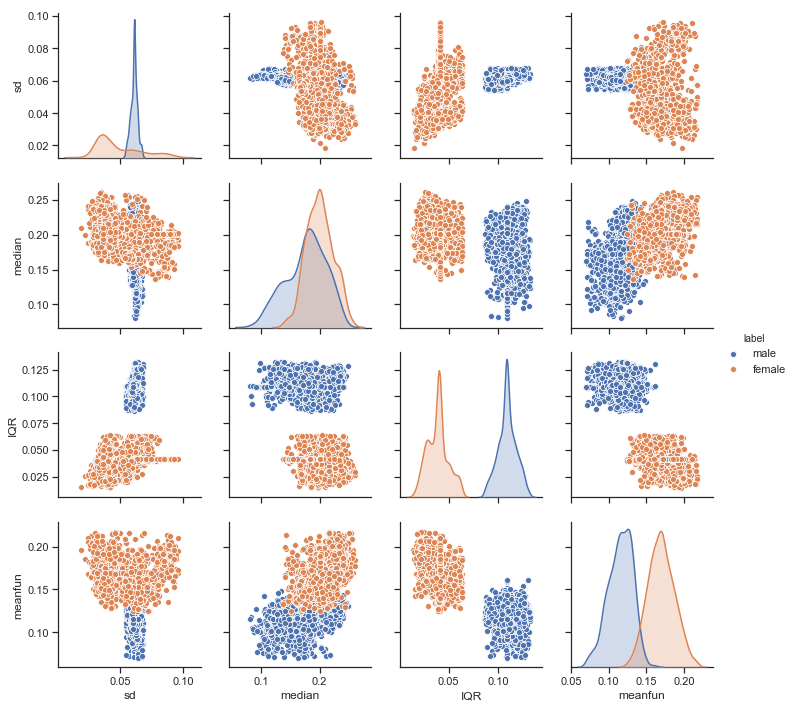

In [117]:
#-----------------------------------------------------------------------
sns.set(style="ticks")
df = dataset
sns.pairplot(df, vars=['sd', 'median','IQR', 'meanfun'], hue="label")
#-----------------------------------------------------------------------------


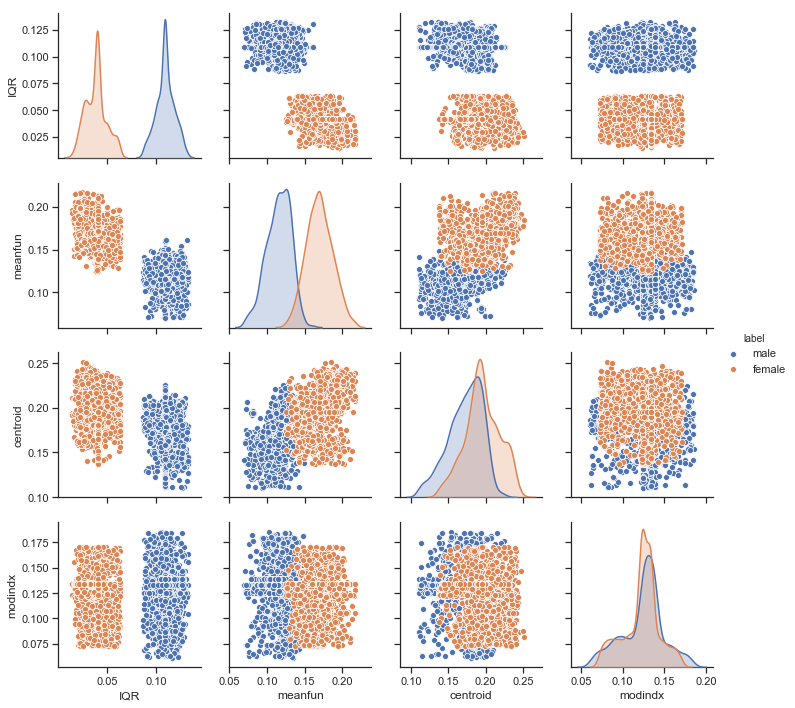

In [118]:
#-----------------------------------------------------------------------
sns.set(style="ticks")
df = dataset
sns.pairplot(df, vars=['IQR', 'meanfun','centroid', 'modindx'], hue="label")
#-----------------------------------------------------------------------------

# Fim da análise exploraria.

---
---
---
---
